# Working notebook to calculate E3SM-2-0 Energy Budget terms

# Notes

## imports

In [1]:
%%time
import matplotlib.pyplot as plt
import nc_time_axis
import numpy as np
import os
os.sys.path.insert(0, "/p/user_pub/xclim/persist/software/xsearch/")
import pdb
import time
import xcdat as xc
import xsearch as xs
from IPython.display import clear_output

CPU times: user 6.21 s, sys: 1.64 s, total: 7.85 s
Wall time: 6.14 s


## load von Schuckmann time history of energy budget

In [2]:
%%time
dataPath = "~/p-work/Shared/obs_data/vonShuckmannetal23ESSD/"
realms = {
    "ocean": "GCOS_EHI_1960-2020_Earth_Heat_Inventory_Ocean_Heat_Content_data.nc", # 19 total_, ocean: 0-300m, 0-700m, 0-2000m, 700-2000m, below_2000m
    "continental": "GCOS_EHI_1960-2020_Continental_Heat_Content_data.nc", # 2 continental_, ground_
    "cryosphere": "GCOS_EHI_1960-2020_Cryosphere_Heat_Content_data.nc", # 6 cryosphere_, arctic_sea_ice_, antarctic_sea_ice_, antarctic_ice_sheet_, glaciers_, greenland_
    "atmospheric": "GCOS_EHI_1960-2020_Atmosphere_Heat_Content_data.nc", # 1 atmospheric
    "permafrost": "GCOS_EHI_1960-2020_Permafrost_Heat_Content_data.nc", # 1 permafrost
    "inland_water": "GCOS_EHI_1960-2020_Inland_Water_Heat_Content_data.nc", # 1 inland_water_
}
for count, realm in enumerate(realms.keys()):
    print(count, realm)
    file = realms[realm]
    print("file:", file)
    fullPath = os.path.join(dataPath, file)
    print("fullPath:", fullPath)
    dsKey = "_".join(["ds", realm])
    vars()[dsKey] = xc.open_dataset(fullPath)
    print(eval(dsKey).keys())
    #clear_output(wait=True)

0 ocean
file: GCOS_EHI_1960-2020_Earth_Heat_Inventory_Ocean_Heat_Content_data.nc
fullPath: ~/p-work/Shared/obs_data/vonShuckmannetal23ESSD/GCOS_EHI_1960-2020_Earth_Heat_Inventory_Ocean_Heat_Content_data.nc
KeysView(<xarray.Dataset>
Dimensions:                                     (time: 61)
Coordinates:
  * time                                        (time) object 1960-06-30 00:0...
Data variables: (12/19)
    total_heat_content                          (time) float32 ...
    total_heat_content_uncertainty              (time) float32 ...
    atmospheric_heat_content                    (time) float32 ...
    atmospheric_heat_content_uncertainty        (time) float32 ...
    atmospheric_heat_content_coverage_factor    (time) float32 ...
    continental_heat_content                    (time) float32 ...
    ...                                          ...
    ocean_heat_content_0-2000m                  (time) float32 ...
    ocean_heat_content_0-2000m_uncertainty      (time) float32 ...
  

In [3]:
# interrogate example dataset
ds_ocean
#ds_ocean["ocean_heat_content_0-300m"][-1].data.item()

<xarray.Dataset>
Dimensions:                                     (time: 61)
Coordinates:
  * time                                        (time) object 1960-06-30 00:0...
Data variables: (12/19)
    total_heat_content                          (time) float32 ...
    total_heat_content_uncertainty              (time) float32 ...
    atmospheric_heat_content                    (time) float32 ...
    atmospheric_heat_content_uncertainty        (time) float32 ...
    atmospheric_heat_content_coverage_factor    (time) float32 ...
    continental_heat_content                    (time) float32 ...
    ...                                          ...
    ocean_heat_content_0-2000m                  (time) float32 ...
    ocean_heat_content_0-2000m_uncertainty      (time) float32 ...
    ocean_heat_content_700-2000m                (time) float32 ...
    ocean_heat_content_700-2000m_uncertainty    (time) float32 ...
    ocean_heat_content_below_2000m              (time) float32 ...
    ocean_heat_content_below_2000m_uncertainty  (time) float32 ...
Attributes:
    title:    Data of energy inventory
    paper:    Heat stored in the Earth system 1960-2020: Where does the energ...
    comment:  Period : 1960-2020.

## quick von Schuckmann plots

ocean_heat_content_0-300m 132.94

ocean_heat_content_300-700m 75.30
ocean_heat_content_0-700m 208.24
ocean_heat_content_700-2000m 109.33
ocean_heat_content_below_2000m 26.19
continental_heat_content 23.92
cryosphere_heat_content 13.19
atmospheric_heat_content 05.56
permafrost_heat_content 02.11
inland_water_heat_content 00.20


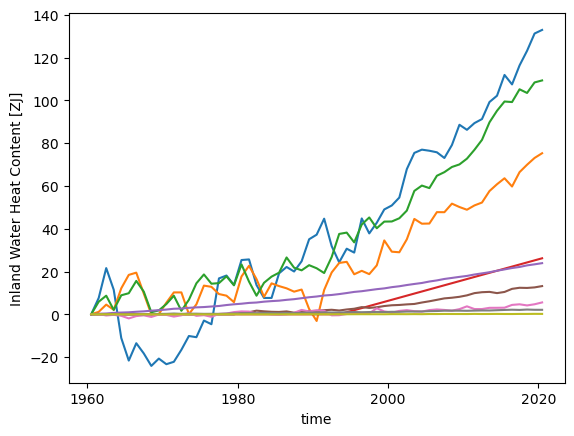

In [4]:
ds_ocean["ocean_heat_content_0-300m"].plot()
print("ocean_heat_content_0-300m", "{:05.2f}".format(ds_ocean["ocean_heat_content_0-300m"][-1].data.item()))
print()
# create 300-700 timeseries
ds3to700 = ds_ocean["ocean_heat_content_0-700m"]-ds_ocean["ocean_heat_content_0-300m"]
ds3to700.plot()
print("ocean_heat_content_300-700m", "{:05.2f}".format(ds3to700[-1].data.item()))
#ds_ocean["ocean_heat_content_0-700m"].plot()
print("ocean_heat_content_0-700m", "{:05.2f}".format(ds_ocean["ocean_heat_content_0-700m"][-1].data.item()))
ds_ocean["ocean_heat_content_700-2000m"].plot()
print("ocean_heat_content_700-2000m", "{:05.2f}".format(ds_ocean["ocean_heat_content_700-2000m"][-1].data.item()))
ds_ocean["ocean_heat_content_below_2000m"].plot()
print("ocean_heat_content_below_2000m", "{:05.2f}".format(ds_ocean["ocean_heat_content_below_2000m"][-1].data.item()))
for realm in realms.keys():
    if realm == "ocean":
        continue
    else:
        varName = "_".join([realm, "heat_content"])
        vars()["ds"] = eval("_".join(["ds", realm]))
        ds[varName].plot()
        print(varName, "{:05.2f}".format(ds[varName][-1].data.item()))

## plot von Shuckmann

(61,)
<class 'numpy.ndarray'>
(9, 61)


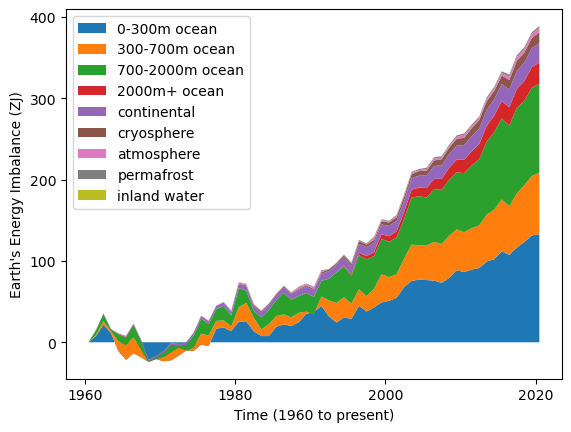

In [50]:
# plot up all components
ocean0to300 = ds_ocean["ocean_heat_content_0-300m"]
ocean300to700 = ds_ocean["ocean_heat_content_0-700m"]-ocean0to300
ocean700to2000 = ds_ocean["ocean_heat_content_700-2000m"]
ocean2000toBottom = ds_ocean["ocean_heat_content_below_2000m"]
continental = ds_continental["continental_heat_content"]
cryosphere = ds_cryosphere["cryosphere_heat_content"]
atmosphere = ds_atmospheric["atmospheric_heat_content"]
permafrost = ds_permafrost["permafrost_heat_content"]
inlandWater = ds_inland_water["inland_water_heat_content"]
ocean0to300.time.attrs["calendar"] = "standard"
x = ocean0to300.time.data # solves TypeError: 'int' object is not iterable
print(x.shape); print(type(x))
y = np.vstack([ocean0to300, ocean300to700, ocean700to2000, ocean2000toBottom, continental, cryosphere, atmosphere, permafrost, inlandWater])
print(y.shape)
labels = ["0-300m ocean", "300-700m ocean", "700-2000m ocean",
          "2000m+ ocean", "continental", "cryosphere",
          "atmosphere", "permafrost", "inland water"]
fig, ax = plt.subplots()
ax.stackplot(x, y, labels=labels)
ax.legend(loc='upper left')
plt.ylabel("Earth's Energy Imbalance (ZJ)")
plt.xlabel("Time (1960 to present)")
plt.show()


## plot volcanic forcings over time - forcing uncertainty is large

In [58]:
%%bash
echo "work in progress"

work in progress


## define target vertical coord and set preset values

In [50]:
cpocean = 3.996e3  # https://github.com/E3SM-Project/E3SM/blob/maint-2.0/share/util/shr_const_mod.F90#L50
rhozero = 1.026e3  # https://github.com/E3SM-Project/E3SM/blob/maint-2.0/share/util/shr_const_mod.F90#L44
oceanVol = 1.33511e+18
newdepth = np.array([5,10,20,30,40,50,75,100,125,150,200,300,500,700,1000,1500,1800,2000]).astype('f');
newdepth.shape

(18,)

## search for E3SM-2-0 historical sims

In [51]:
dpaths = xs.findPaths('historical', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon')
#for count, sim in enumerate(dpaths):
#    print("{:03d}".format(count), sim)
#print(dpaths.keys())
sims = xs.getValuesForFacet(dpaths, 'model', 'E3SM-2-0')  # also E3SM-1-0 (E3SM-Project (1-5), UCSB, E3SM-Project), E3SM-1-1 + ECA, E3SM-2-0-NARRM
sims

['/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r1i1p1f1/Omon/thetaoga/gr/v20221112/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r2i1p1f1/Omon/thetaoga/gr/v20221113/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r3i1p1f1/Omon/thetaoga/gr/v20221113/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r4i1p1f1/Omon/thetaoga/gr/v20221114/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r5i1p1f1/Omon/thetaoga/gr/v20221115/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r6i1p1f1/Omon/thetaoga/gr/v20230805/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r7i1p1f1/Omon/thetaoga/gr/v20230811/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r8i1p1f1/Omon/thetaoga/gr/v20230818/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r9i1p1f1/Omon/thetaoga/gr/v20230827/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r10i1p1f1/Omon/thet

## check E3SM-2-0 global curves

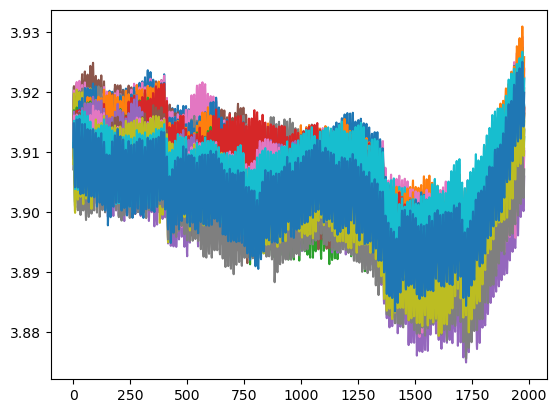

In [53]:
ds = xc.open_mfdataset(sims[0])
plt.plot(ds['thetaoga'])
yrange = [3.7, 3.94]
#plt.ylim(yrange)
for sim in sims[1:]:
    ds = xc.open_mfdataset(sim)
    plt.plot(ds['thetaoga'])
plt.show()

## search for GFDL-CM4 historical sims

In [44]:
dpaths = xs.findPaths('historical', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon')
#print(dpaths.keys())
sims = xs.getValuesForFacet(dpaths, 'model', 'GFDL-CM4')
sims

['/p/css03/esgf_publish/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/Omon/thetaoga/gn/v20180701/']

## check GFDL-CM4 global curves

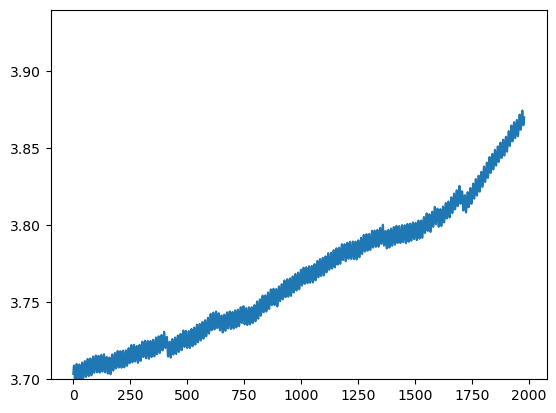

In [45]:
ds = xc.open_mfdataset(sims[0])
plt.plot(ds['thetaoga'])
plt.ylim(yrange)
for sim in sims[1:]:
    ds = xc.open_mfdataset(sim)
    plt.plot(ds['thetaoga'])
plt.show()

## search for ACCESS-CM2 historical sims

In [54]:
dpaths = xs.findPaths('historical', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon', mip_era='CMIP6')
sims = xs.getValuesForFacet(dpaths, 'model', 'ACCESS-CM2')
sims

['/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/thetaoga/gn/v20200311/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r2i1p1f1/Omon/thetaoga/gn/v20200311/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r3i1p1f1/Omon/thetaoga/gn/v20200311/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r4i1p1f1/Omon/thetaoga/gn/v20210607/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r5i1p1f1/Omon/thetaoga/gn/v20210607/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r6i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r7i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r8i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r9i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_pub

## check ACCESS-CM2 global curves

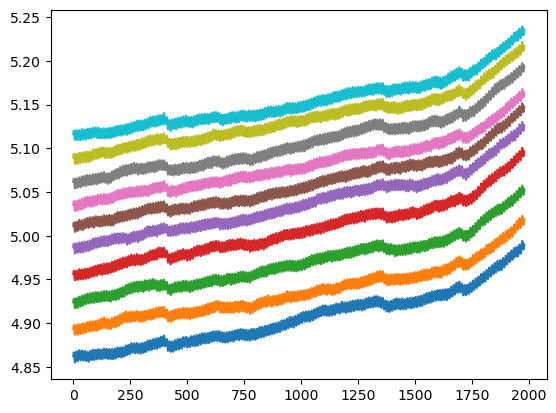

In [55]:
ds = xc.open_mfdataset(sims[0])
plt.plot(ds['thetaoga'])
#plt.ylim(yrange)
for sim in sims[1:]:
    ds = xc.open_mfdataset(sim)
    plt.plot(ds['thetaoga'])
plt.show()